### 4.2 Random Forest Regressor

In [ ]:
#importing randomForestRegressor algorithm
from sklearn.ensemble import RandomForestRegressor

# rfr :  randomforestregressor
rfr = Pipeline(
    steps=[
        ("preprocessor", transform_preprocessor),
        ("regr", RandomForestRegressor())
    ]
).set_output(transform="pandas")

rfr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly_int',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'reg_code',
                                                   'standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type',
                                                   'crosso...
                                                   'fuel_type_diesel',
                                                   'fuel_type_electric',
                                                   'fuel_type_petrol',
                                                   'fuel_type_petrol_hybrid',
                                                   'fuel_type_petrol_plug_in_hybrid',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('regr', RandomForestRegressor())])

#### Evaluation of Random Forest Regressor model

In [ ]:
# Predicting train set to evaluate model
rfr_train_prediction = rfr.predict(X_train)

# mean absolute error of model
mean_absolute_error(y_train, rfr_train_prediction)

752.6729127792595

In [ ]:
# R Squared Error
error_score=metrics.r2_score(y_train,rfr_train_prediction)
print(" R Squared Error: ",error_score)

 R Squared Error:  0.9808262015236411


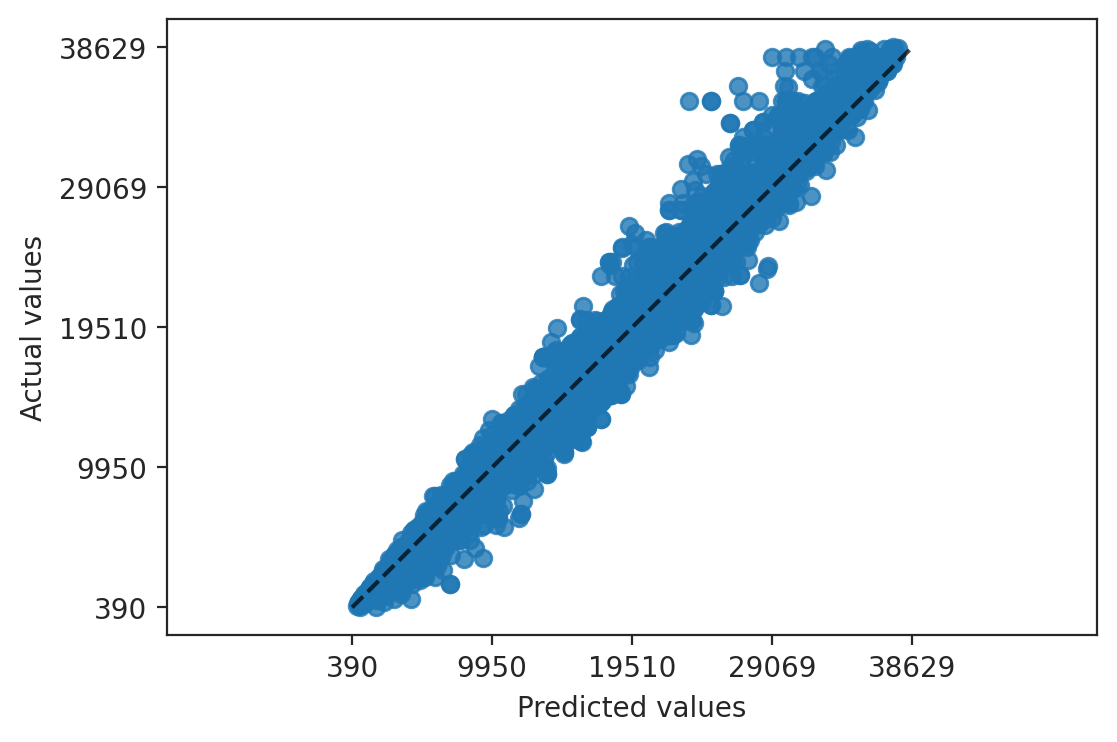

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=rfr_train_prediction,
    kind="actual_vs_predicted",
    subsample=10000,
    random_state=0,
)

#### Model prediction evaluation of Random Forest Regressor

In [ ]:
# Predicting train set to evaluate model
rfr_test_prediction = rfr.predict(X_test)

# mean absolute error of model
mean_absolute_error(y_test, rfr_test_prediction)

1949.1241973781498

The Random Forest Regressor's mean absolute error (MAE) on the test set is 1971.804. The MAE calculates the average absolute variance between the actual values and the values that were predicted. The MAE of 1971.804 in this instance shows that, on average, the anticipated prices differ from the actual prices by roughly $1971.804.

Lower MAE values imply higher performance because they show that the forecasts are more accurate than the actual values. The Random Forest Regressor has a lower MAE than the earlier models, demonstrating greater accuracy in price prediction. To acquire a thorough understanding of the Random Forest Regressor's predictive skills, it is crucial to take into account various evaluation criteria and compare its performance with that of other models.


In [ ]:
# R Squared Error
error_score=metrics.r2_score(y_test, rfr_test_prediction)
print(" R Squared Error: ",error_score)

 R Squared Error:  0.8741012400713716


The features included in the Random Forest Regressor model can account for about 86.92% of the price volatility, according to an R-squared value of 0.8692. This shows that the model is doing a good job of capturing the underlying patterns and correlations in the data, which results in accurate price forecasts.

Indicating that a greater percentage of the variance is accounted for by the model, a higher R-squared value indicates better quality of fit. The Random Forest Regressor therefore has good predictive performance in calculating the price based on the provided variables, as indicated by its R-squared value of 0.8692.

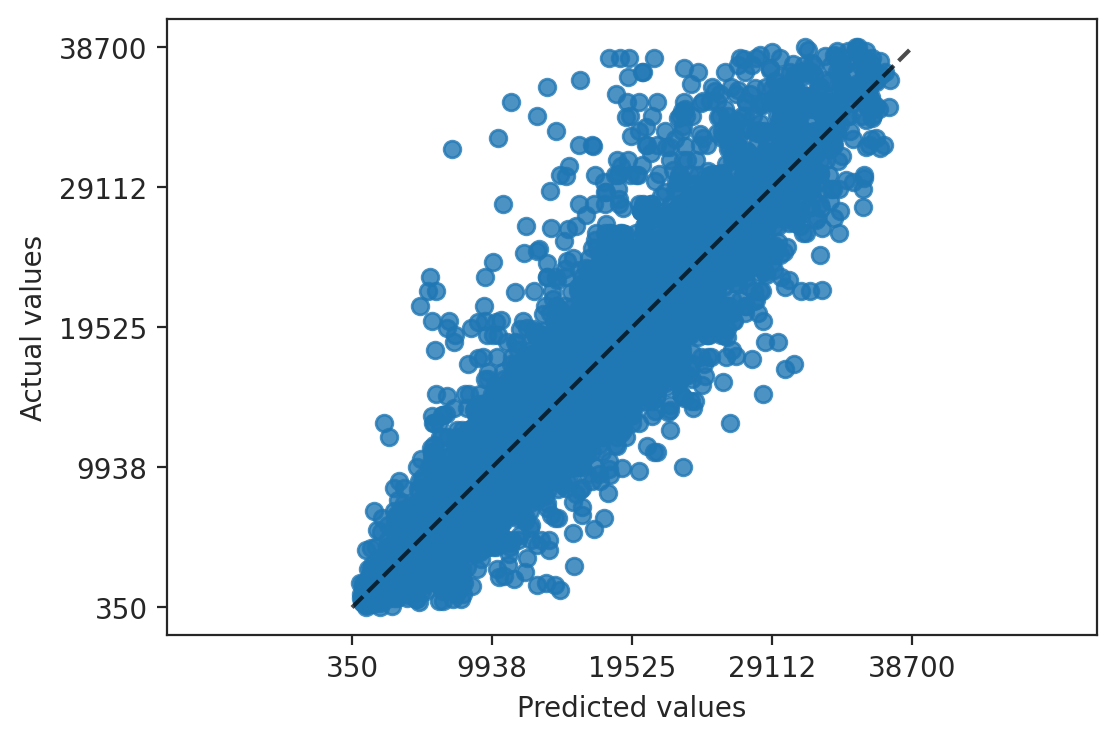

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=rfr_test_prediction,
    kind="actual_vs_predicted",
    subsample=10000,
    random_state=0,
)